In [15]:
import warnings
warnings.filterwarnings("ignore")

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = 50
sns.set_style('darkgrid')

In [17]:
nifty_50 = pd.read_csv('Sets/NIFTY 50.csv',parse_dates=["Date"], index_col="Date")
nifty_50.head()

,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
Date,,,,,,,,,
2000-01-03,1482.15,1592.90,1482.15,1592.2,25358322,8.841500e+09,25.91,4.63,0.95
2000-01-04,1594.40,1641.95,1594.40,1638.7,38787872,1.973690e+10,26.67,4.76,0.92
2000-01-05,1634.55,1635.50,1555.05,1595.8,62153431,3.084790e+10,25.97,4.64,0.95
2000-01-06,1595.80,1639.00,1595.80,1617.6,51272875,2.531180e+10,26.32,4.70,0.94
2000-01-07,1616.60,1628.25,1597.20,1613.3,54315945,1.914630e+10,26.25,4.69,0.94


In [18]:
nifty_50.isnull().sum()


Open         0
High         0
Low          0
Close        0
Volume       0
Turnover     0
P/E          0
P/B          0
Div Yield    0
dtype: int64

In [19]:
nifty_50.interpolate(method='time', inplace=True)

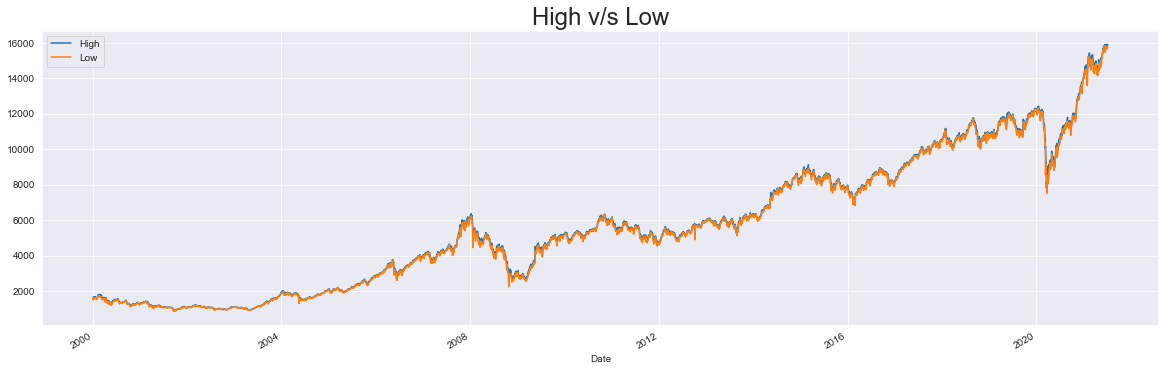

In [20]:
ax = nifty_50[['High', 'Low']].plot(figsize=(20, 6))
ax.set_title('High v/s Low', fontsize=24);

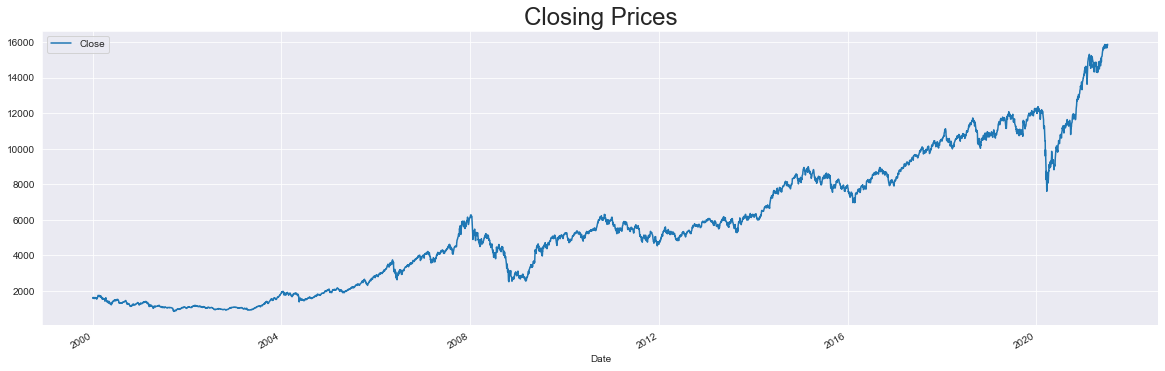

In [21]:
ax = nifty_50[['Close']].plot(figsize=(20, 6))
ax.set_title('Closing Prices', fontsize=24);

PE = MAR VAL PER SHARE/EARNING PER SHARE
PB = MAR PRICE PER SHARE/BOOK VALUE PER SHARE

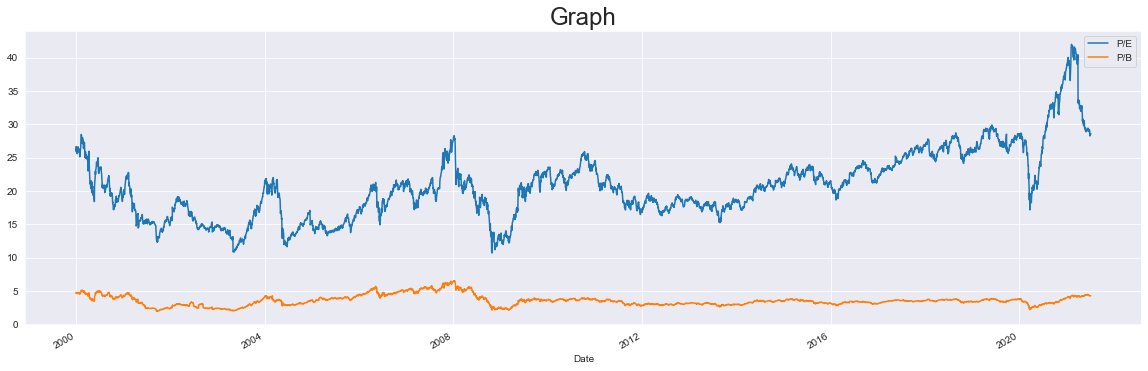

In [22]:
ax = nifty_50[['P/E','P/B']].plot(figsize=(20, 6))
ax.set_title('Graph', fontsize=24);

In [23]:
nifty_auto = pd.read_csv('Sets/NIFTY AUTO.csv',parse_dates=["Date"], index_col="Date")
nifty_bank = pd.read_csv('Sets/NIFTY BANK.csv',parse_dates=["Date"], index_col="Date")
nifty_fmcg = pd.read_csv('Sets/NIFTY FMCG.csv',parse_dates=["Date"], index_col="Date")
nifty_IT = pd.read_csv('Sets/NIFTY IT.csv',parse_dates=["Date"], index_col="Date")
nifty_metal = pd.read_csv('Sets/NIFTY METAL.csv',parse_dates=["Date"], index_col="Date")
nifty_pharma = pd.read_csv('Sets/NIFTY PHARMA.csv',parse_dates=["Date"], index_col="Date")


nifty_auto.interpolate(method='time', inplace=True)
nifty_bank.interpolate(method='time', inplace=True)
nifty_fmcg.interpolate(method='time', inplace=True)
nifty_IT.interpolate(method='time', inplace=True)
nifty_metal.interpolate(method='time', inplace=True)
nifty_pharma.interpolate(method='time', inplace=True)

df = pd.DataFrame({
    'NIFTY Auto index': nifty_auto['Close']['2020':].values, 
    'NIFTY Bank index': nifty_bank['Close']['2020':].values,
    'NIFTY FMCG index': nifty_fmcg['Close']['2020':].values,
    'NIFTY IT index': nifty_IT['Close']['2020':].values,
    'NIFTY Metal index': nifty_metal['Close']['2020':].values,
    'NIFTY Pharma index': nifty_pharma['Close']['2020':].values,
})

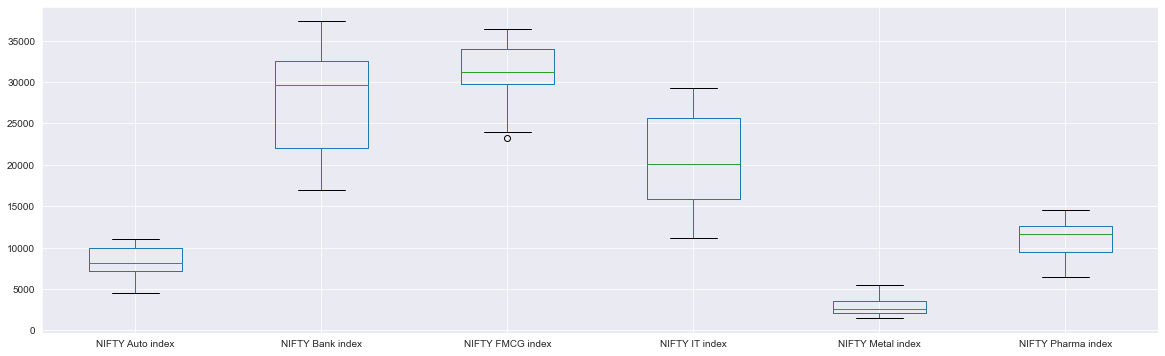

In [24]:
ax = df.plot.box(figsize=(20, 6))

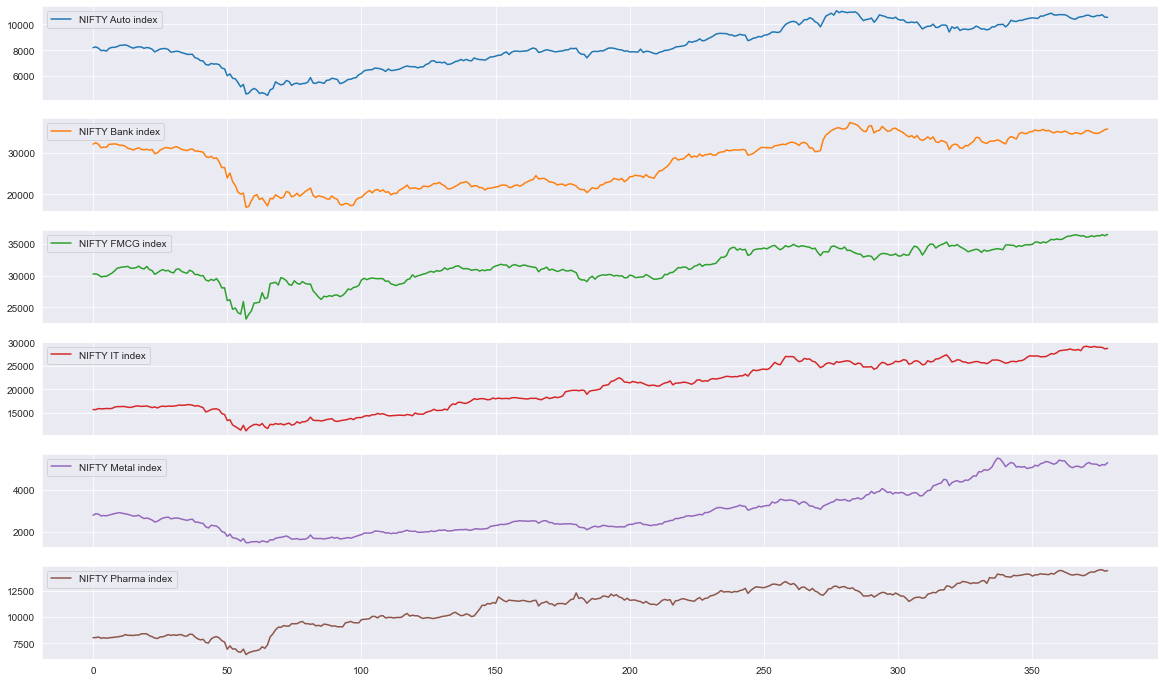

In [25]:
ax = df.plot(subplots=True, figsize=(20, 12))

#RELIANCE 

In [27]:
data = pd.read_csv("DataSets/RELIANCE.csv", parse_dates=['Date'], index_col='Date', usecols=['Date', 'Open','High','Low','Close','Volume','VWAP'])
print(data.shape)
data.head()

(5306, 6)


,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2000-01-03,237.50,251.70,237.50,251.70,249.37,4456424
2000-01-04,258.40,271.85,251.30,271.85,263.52,9487878
2000-01-05,256.65,287.90,256.65,282.50,274.79,26833684
2000-01-06,289.00,300.70,289.00,294.35,295.45,15682286
2000-01-07,295.00,317.90,293.00,314.55,308.91,19870977


In [28]:
data.tail()

,Open,High,Low,Close,VWAP,Volume
Date,,,,,,
2021-04-26,1920.00,1962.0,1911.50,1937.85,1941.32,9620785
2021-04-27,1940.00,1997.2,1938.25,1988.65,1978.64,9226547
2021-04-28,1997.85,2008.0,1980.15,1997.30,1997.60,7902002
2021-04-29,2022.90,2044.5,2007.30,2024.05,2024.21,8035915
2021-04-30,2008.50,2036.0,1987.55,1994.50,2010.20,9150974


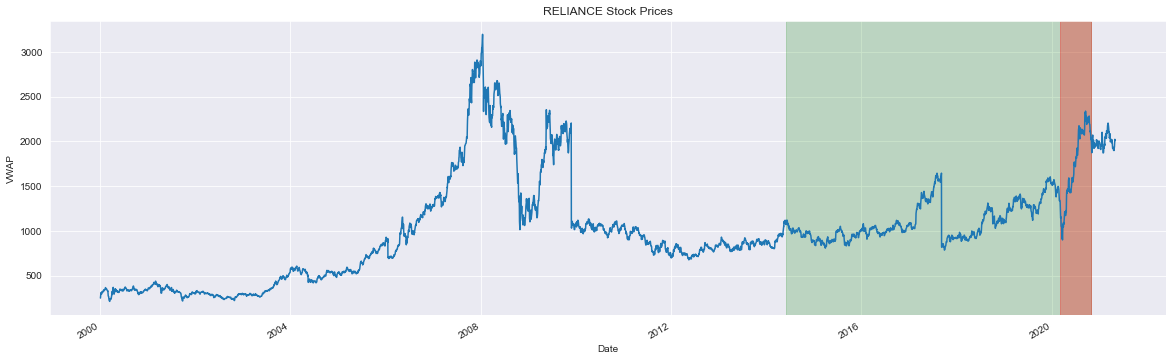

In [29]:
ax = data['VWAP'].plot(figsize=(20,6))
ax.set_title('RELIANCE Stock Prices')
ax.axvspan('2014-06-01','2020-10-30', color='green', alpha=0.2) # Modi Govt
ax.axvspan('2020-03-01','2020-10-30', color='red', alpha=0.3) # Covid Pandemic
ax.set_ylabel('VWAP');

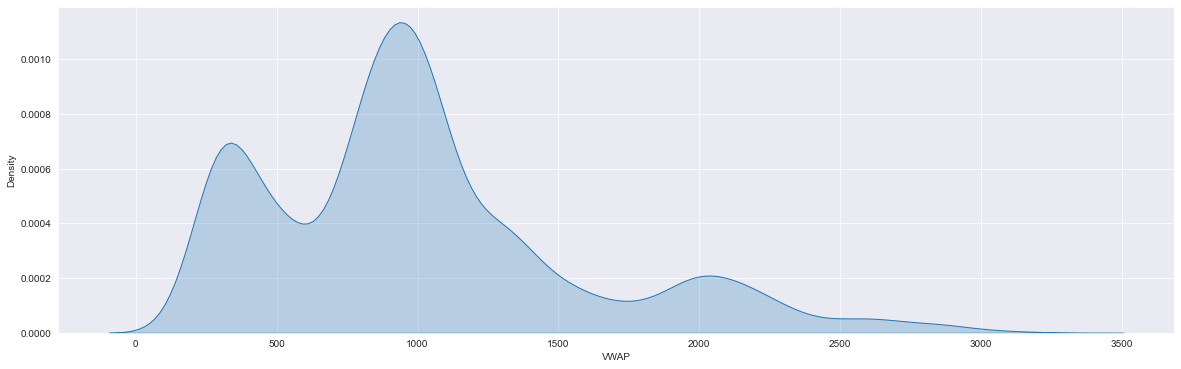

In [30]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.kdeplot(data['VWAP'],shade=True, ax=ax);

In [31]:
data = data.resample('D').mean()
data.isnull().sum()

Open      2483
High      2483
Low       2483
Close     2483
VWAP      2483
Volume    2483
dtype: int64

In [32]:

data.interpolate(method='time', inplace=True)

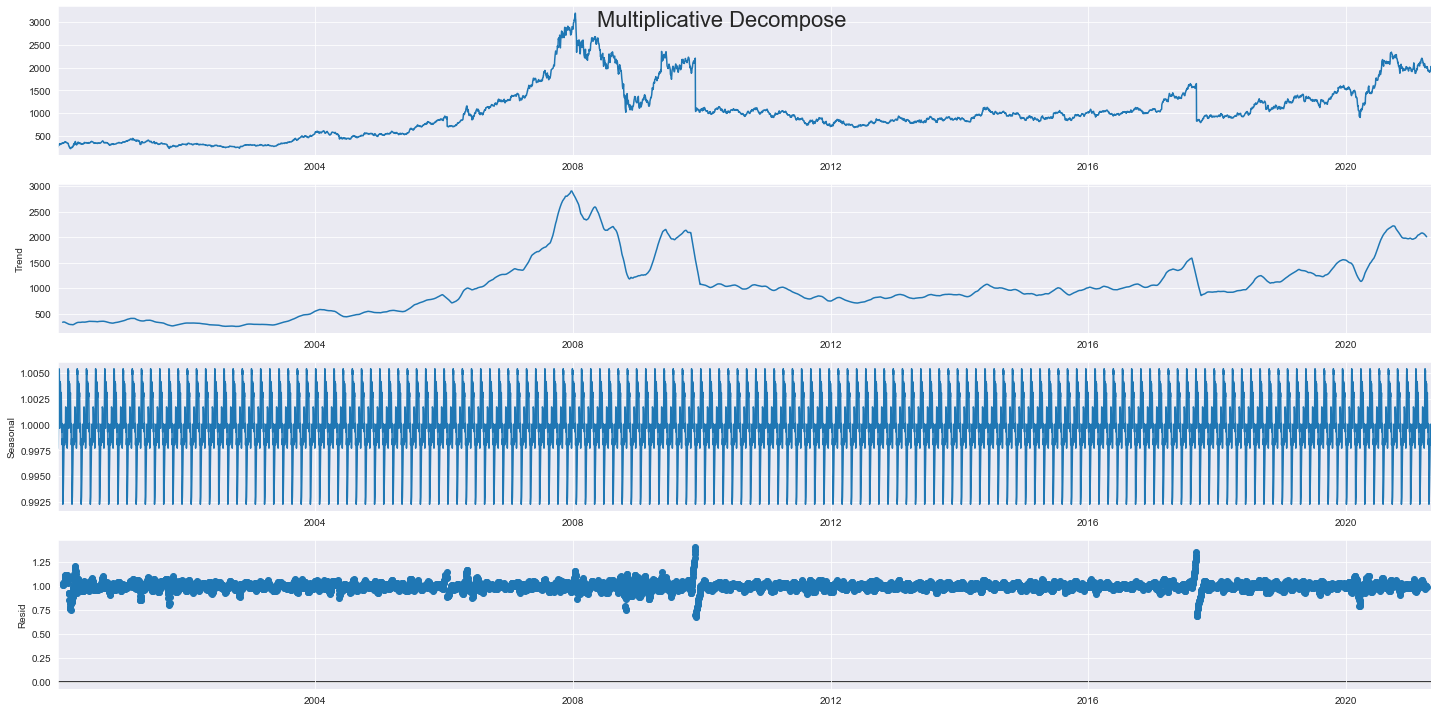

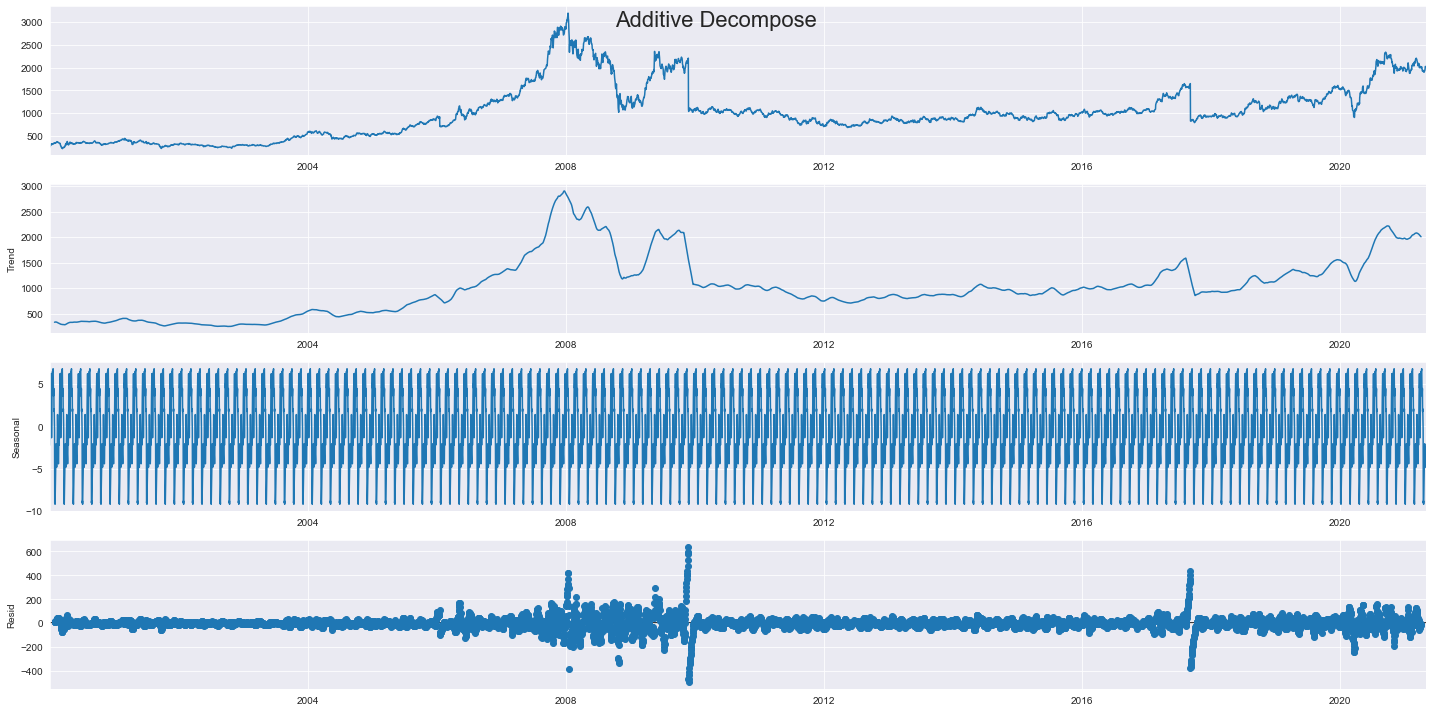

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

plt.rcParams.update({'figure.figsize': (20,10)})
y = data['VWAP'].to_frame()
seasonal_decompose(y, model='multiplicative',period = 52).plot().suptitle('Multiplicative Decompose', fontsize=22)
seasonal_decompose(y, model='additive',period = 52).plot().suptitle('Additive Decompose', fontsize=22);

In [35]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string(), '\n')          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")
        
    return out

adf_test(data['VWAP'],title='Reliance Stock Data');

Augmented Dickey-Fuller Test: Reliance Stock Data
ADF test statistic        -1.754482
p-value                    0.403283
# lags used                7.000000
# observations          7781.000000
critical value (1%)       -3.431191
critical value (5%)       -2.861912
critical value (10%)      -2.566968 

Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


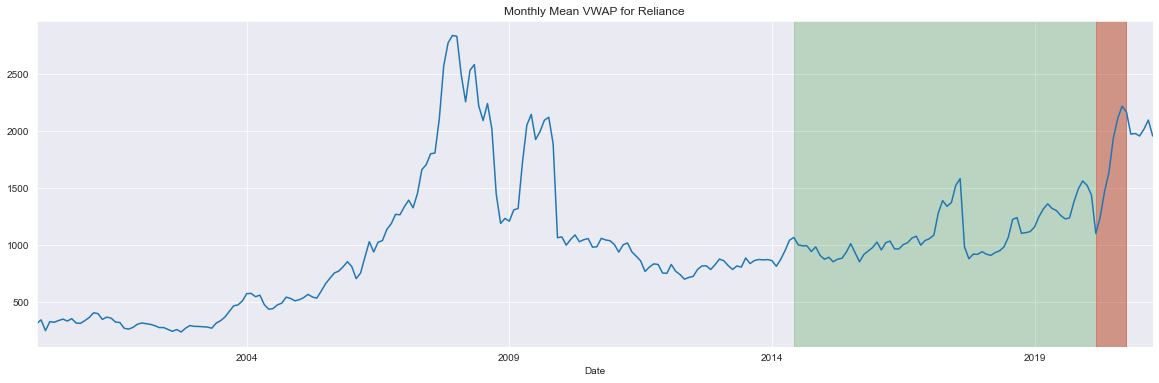

In [36]:
ax = data['VWAP'].resample('M').mean().plot.line(figsize=(20, 6))
ax.axvspan('2014-06','2020-10', color='green', alpha=0.2) # Modi Govt
ax.axvspan('2020-03','2020-10', color='red', alpha=0.3) # Covid Pandemic
ax.set_title('Monthly Mean VWAP for Reliance');

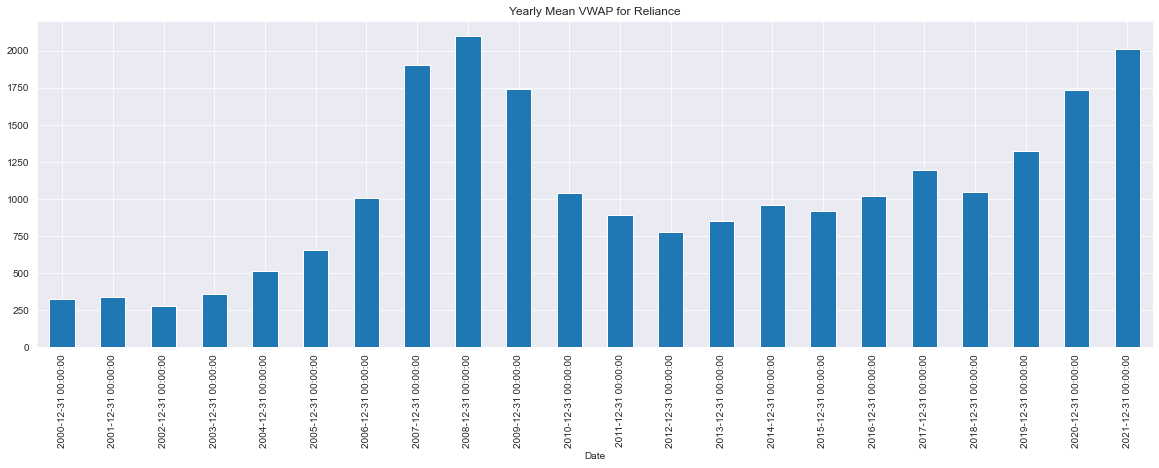

In [37]:
ax = data['VWAP'].resample('A').mean().plot.bar(figsize=(20, 6))
ax.set_title('Yearly Mean VWAP for Reliance');